# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Решение:**
1. Заметим, что сумма любых двух весов больше оставшегося. Поэтому голосование в данном случае выдает правильный ответ, если ошибся не более, чем 1 алгоритм. Вероятность того, что все 3 алгоритма ответили правильно, равна $(1-p)^3$. Вероятность того, что ровно 2 алгоритма ответили правильно, равна $3p(1-p)^2$. Таким образом, вероятность ошибки равна: $1 - (1-p)^3 - 3p(1-p)^2$. Раскрывая скобки и упрощая выражение получаем $p^2(3-2p)$.

2. В данном случае, сумма весов 1-ого и 3-его алгоритмов меньше, чем вес 2-ого алгоритма. Соответственно, сумма весов 2-ого с любым из оставшихся будет больше, веса алгоритма, не вошедшего в сумму. Т.е. если ошибается второй алгоритм, то ошибается и вся композиция. Поэтому вероятность ошибки композиции равна вероятности ошибки 2-ого алгоритма и равна $p$.

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

**Решение:**

$$a_n(x) = \sum_{i=1}^{n-1} \gamma_i b_i(x)$$
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
$$s_i^{(n)} = -\frac{\partial L}{\partial z}(y, z)|_{z=a_{n-1}(x)} = \frac{y}{a_{n-1}(x)} + \frac{1-y}{1-a_{n-1}(x)}$$
Формула для поиска базовых алгоритмов:
$$b_n = argmin_b \sum_{i=1}^l(b(x) - s_i)^2$$
Формула для поиска коэффициентов:
$$\gamma_n = argmin_{\gamma}\sum_{i=1}^lL(y, a_{n-1}(x) + \gamma b_n(x)) = argmin_{\gamma}[-\sum_{i=1}^l(y\log(a_{n-1}(x)+\gamma b_n(x)) + (1-y)\log(1-a_{n-1}(x)-\gamma b_n(x))]$$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

**Решение:**

По условию, базовый классификатор допускает ошибку только на объекте $x_j$, поэтому 
$$err_n = \frac{w_j}{\sum_{i=1}^N w_i}$$.
Тогда
$$a_n = \log\frac{1-err_n}{err_n} = \log\frac{\sum_{i\ne j}^N w_i^{(n)}}{w_j^{(n)}}$$
Т.е. 
$$w_j^{(n+1)} = w_j^{(n)}\exp a_n = w_j^{(n)} \frac{\sum_{i\ne j}^N w_i^{(n)}}{w_j^{(n)}} = \sum_{i\ne j}^N w_i^{(n)}$$
Соответсвенно, нормированный вес при объекте $x_j$ на $(n+1)$-ой итерации будет равен:
$$\frac{w_j^{(n+1)}}{\sum_{i=1}^N w_i^{(n+1)}} = \frac{\sum_{i\ne j}^N w_i^{(n)}}{\sum_{i\ne j}^N w_i^{(n)} + \sum_{i\ne j}^N w_i^{(n+1)}}(1)$$
А т.к. изменился только вес $w_j$, то суммы $\sum_{i\ne j}^N w_i^{(n)}$ и $\sum_{i\ne j}^N w_i^{(n+1)}$ равны. Следовательно, отношение (1) равно $\frac{1}{2}$.

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [5]:
from sklearn.base import ClassifierMixin
from sklearn.base import BaseEstimator

from sklearn import tree

from collections import Counter, defaultdict
from copy import deepcopy
from operator import itemgetter
from random import shuffle

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pylab, gridspec, pyplot as plt
from IPython.display import Image
import urllib


from sklearn.metrics import accuracy_score
from sklearn import metrics, neighbors, dummy, preprocessing, svm
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib
%matplotlib inline

In [277]:
class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees=10, max_depth=5, max_features='sqrt', criterion='gini', version=1):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = [None] * self.num_trees
        self._using_data_set = [None] * self.num_trees
        self.version = version
     
    #если version=1 подвыборка выбирается перед построением всего дерева
    #иначе в каждом сплите
    def bagging(self, X_train, y_train, size):
        n_data = X_train.shape[1]
        if (type(self.max_features) == float):
            n_data_forest = self.max_features * n_data
        elif (self.max_features == 'log2'):
            n_data_forest = int(np.floor(np.log2(n_data)))
        elif (type(self.max_features) == int):
            n_data_forest = self.max_features
        elif (self.max_features == None):
            n_data_forest = n_data
        else:
            n_data_forest = int(np.floor(np.sqrt(n_data)))
        bs_X = list()
        bs_y = list()
        if (self.version==1):
            for i in range(self.num_trees):
                index = np.random.choice(len(y_train), size=size, replace=True)
                col = np.random.choice(n_data, size=n_data_forest, replace=True)
                bs_X.append(X_train[np.ix_(index, col)])
                bs_y.append(y_train[index])
                self._using_data_set[i] = col
        else:
            index = np.random.choice(len(y_train), size=size, replace=True)
            col = np.random.choice(n_data, size=n_data_forest, replace=True)
            for i in range(self.num_trees):
                bs_X.append(X_train[np.ix_(index, col)])
                bs_y.append(y_train[index])
                self._using_data_set[i] = col
        return bs_X, bs_y
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        self._targets = np.unique(y_train)
        size = len(y_train)
        bs_X, bs_y = self.bagging(X_train, y_train, size)
        for i, (i_bs_X, i_bs_y) in enumerate(zip(bs_X, bs_y)):
            cur_tree = tree.DecisionTreeClassifier(max_depth=self.max_depth, 
                                                   max_features=self.max_features,
                                                   criterion = self.criterion)
            cur_tree = cur_tree.fit(i_bs_X, i_bs_y)
            self.trees[i] = cur_tree
        return self

    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        votes = [tree.predict(X_test[:, using_data]) for tree, using_data in zip(self.trees, self._using_data_set)]
        counts = [Counter(row) for row in np.array(votes).transpose()]
        counts_array = np.zeros((len(X_test), len(self._targets)))
        for row_index, count in enumerate(counts):
            for target_index, target_ in enumerate(self._targets):
                counts_array[row_index, target_index] = count[target_]
        proba = counts_array / self.num_trees
        return self._targets[np.argmax(proba, axis=1)]

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [20]:
# Используются данные из https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('Class;Alcohol;Malic acid;Ash;Alcalinity of ash;Magnesium;Total phenols;Flavanoids;\
           Nonflavanoid phenols;Proanthocyanins;Color intensity;Hue;OD280/OD315 of diluted wines;Proline')
df.columns = columns.split(';')

In [21]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [153]:
char_matr = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
           'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
X = np.array(df[char_matr])
y = np.array(df['Class'])

In [154]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [155]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [282]:
rf = RandomForest()
rf.fit(X_train, y_train)

RandomForest(criterion='gini', max_depth=5, max_features='sqrt', num_trees=10,
       version=1)

In [283]:
print("num_trees = 10 " + "accuracy on train data ", accuracy_score(rf.predict(X_train), y_train), " accuracy on test data ",
      accuracy_score(rf.predict(X_test), y_test))

num_trees = 10 accuracy on train data  0.9929577464788732  accuracy on test data  0.9722222222222222


Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

In [280]:
acc = []
for i in range(1, 101, 1):
    rf = RandomForest(num_trees=i, max_features='sqrt')
    rf.fit(X_train, y_train)
    acc.append(accuracy_score(rf.predict(X_test), y_test))

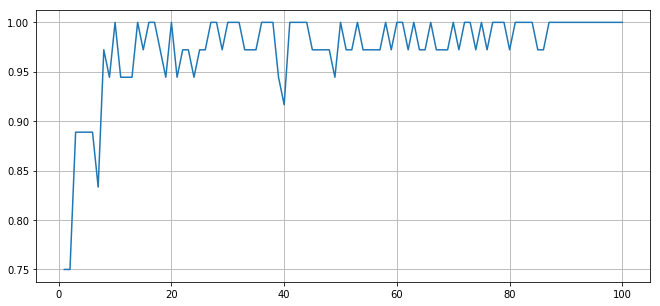

In [281]:
plt.figure(figsize=(11,5))
plt.plot(np.arange(1, 101, 1), acc)
plt.grid()
plt.show()

Как мы можем видеть из графика, переобучения нет.

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
skl_acc = []
for i in range(1, 101, 1):
    skl_rf = RandomForestClassifier(n_estimators=i, max_features='sqrt')
    skl_rf.fit(X_train, y_train)
    skl_acc.append(accuracy_score(skl_rf.predict(X_test), y_test))

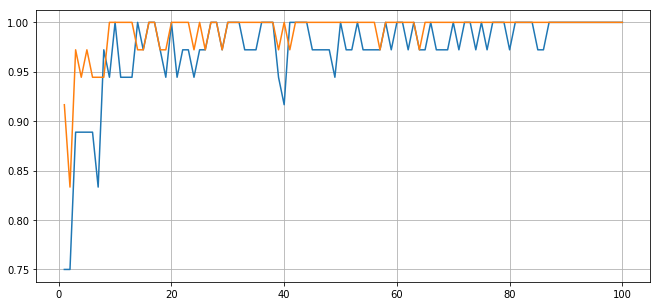

In [285]:
plt.figure(figsize=(11,5))
plt.plot(np.arange(1, 101, 1), acc)
plt.plot(np.arange(1, 101, 1), skl_acc)
plt.grid()
plt.show()

Точность нашей реализации совпадает с точностью библиотечной реализации в пределах 10%, что, в общем-то, неплохо.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [290]:
acc2 = []
for i in range(1, 101, 1):
    rf2 = RandomForest(num_trees=i, max_features='sqrt')
    rf2.fit(X_train, y_train)
    acc2.append(accuracy_score(rf2.predict(X_test), y_test))

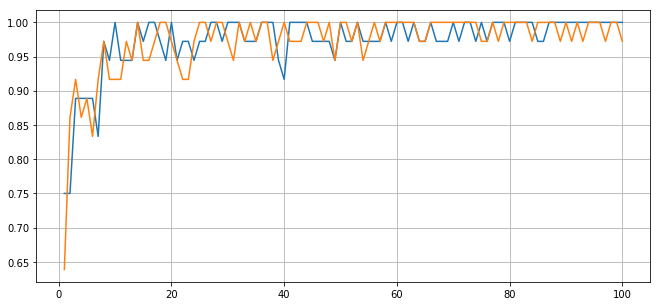

In [291]:
plt.figure(figsize=(11,5))
plt.plot(np.arange(1, 101, 1), acc)
plt.plot(np.arange(1, 101, 1), acc2)
plt.grid()
plt.show()

В модификации дерева точность при меньшем числе деревьев несколько хуже, чем в первой реализации.